# Data visualization
This notebook is used to visualise the outcome of the optimization for the Zambezi river basin case. 

## Base case

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('optimization_results')

In [20]:
# Load the merged results
column_names = ['Hydropower', 'Environment', 'Irrigation']
obj_merged = pd.read_csv(f"merged_results_1_borg_test.csv", index_col=0) #, usecols = column_names)

In [21]:
obj_merged

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v223,v224,v225,v226,v227,v228,v229,Hydropower,Environment,Irrigation
0,0.018762,0.531565,-0.696450,0.574532,0.027900,0.501653,0.486107,0.329113,0.484768,0.722809,...,0.778168,0.528610,-0.939169,-0.263760,-0.731669,0.622836,0.587193,17.475007,2.431899e+06,1.888926
1,-0.529533,-0.005304,0.860120,0.908434,0.161626,-0.131621,0.216482,-0.559867,0.437436,0.144807,...,0.538644,-0.363541,0.729996,-0.654325,0.897098,0.871820,-0.068685,16.260526,2.908417e+06,1.616678
2,-0.443514,-0.586905,0.916707,0.894374,-0.421911,-0.410516,0.316851,-0.626841,0.183573,0.745598,...,-0.574554,-0.623369,0.958851,-0.852047,0.813274,-0.495231,-0.134457,17.822142,2.419847e+06,1.541851
3,0.086214,-0.879385,0.358039,-0.435659,-0.297331,0.017329,0.411273,-0.039001,-0.670660,0.049243,...,0.344386,0.220231,0.366066,0.297061,-0.536556,0.480177,0.371526,18.554144,2.182799e+06,1.443178
4,-0.008272,-0.070343,-0.338294,0.847359,-0.578359,-0.971665,0.132199,0.230651,-0.123176,-0.393732,...,0.011647,0.013962,0.022327,0.314361,-0.262529,0.751987,0.645381,17.274619,2.443252e+06,1.224612
5,-0.331334,-0.644638,-0.167958,-0.843773,0.622310,-0.365767,0.296949,-0.849089,-0.907608,0.990881,...,0.210179,-0.916680,-0.314043,0.840519,0.558561,-0.986525,-0.837532,19.829926,2.149108e+06,1.930044
6,-0.821830,-0.730092,-0.080379,-0.212059,-0.612806,0.218698,-0.590159,-0.713862,-0.428474,-0.354886,...,-0.343903,0.587779,-0.352817,0.484716,0.889336,-0.275911,0.016964,16.471648,2.706705e+06,1.032679


In [6]:
# Only consider the last three columns containing the objectives
df1 = df.iloc[:,-3:]
df1

,Hydropower,Environment,Irrigation
0,17.475007,2.431899e+06,1.888926
1,16.260526,2.908417e+06,1.616678
2,17.822142,2.419847e+06,1.541851
3,18.554144,2.182799e+06,1.443178
4,17.274619,2.443252e+06,1.224612
5,19.829926,2.149108e+06,1.930044
6,16.471648,2.706705e+06,1.032679


In [7]:
print(df1.columns)

Index(['Hydropower', 'Environment', 'Irrigation'], dtype='object')


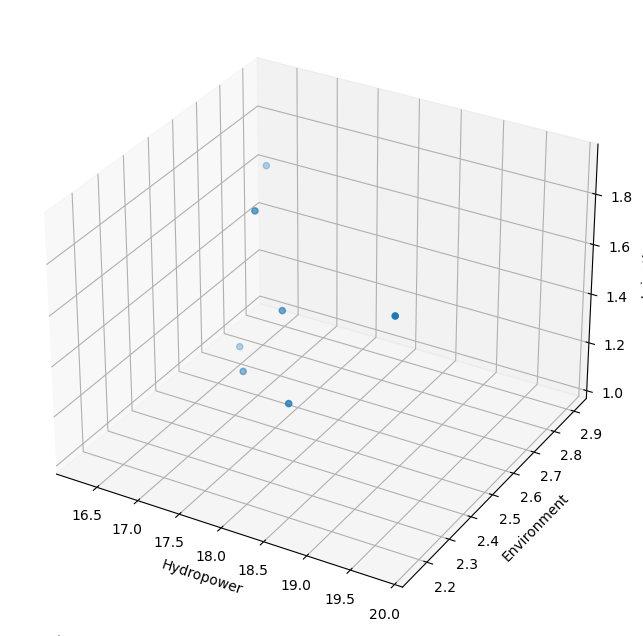

In [8]:
# Create a 3D plot
from mpl_toolkits.mplot3d import Axes3D  

outcomes = df1 #results.loc[:, ['max_P', 'utility', 'reliability']]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(outcomes.Hydropower, outcomes.Environment, outcomes.Irrigation)
ax.set_xlabel('Hydropower')
ax.set_ylabel('Environment')
ax.set_zlabel('Irrigation')
plt.show()



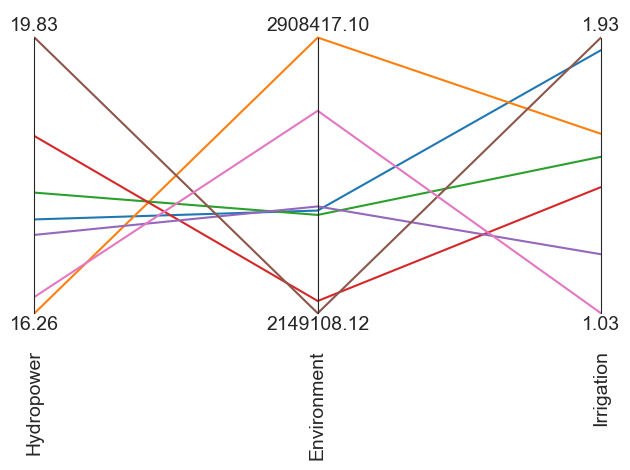

In [9]:
# Create parallel axis
from ema_workbench.analysis import parcoords

limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)

# we invert this axis so direction of desirability is the same 
#axes.invert_axis('max_P') 
plt.show()



In [ ]:
#TODO: Parallel plot



In [18]:
"""

Created on 20 sep. 2011


.. codeauthor:: jhkwakkel <j.h.kwakkel (at) tudelft (dot) nl>

"""

import matplotlib.pyplot as plt
import numpy as np

from ema_workbench import load_results, ema_logging
from ema_workbench.analysis.pairs_plotting import pairs_lines, pairs_scatter, pairs_density

ema_logging.log_to_stderr(level=ema_logging.DEFAULT_LEVEL)

# load the data
#fh = "./data/1000 flu cases no policy.tar.gz"
experiments, outcomes = load_results("merged_results_1_borg_test.csv")

# transform the results to the required format
# that is, we want to know the max peak and the casualties at the end of the
# run
tr = {}

# get time and remove it from the dict
time = outcomes.pop("TIME")

for key, value in outcomes.items():
    if key == "deceased population region 1":
        tr[key] = value[:, -1]  # we want the end value
    else:
        # we want the maximum value of the peak
        max_peak = np.max(value, axis=1)
        tr["max peak"] = max_peak

        # we want the time at which the maximum occurred
        # the code here is a bit obscure, I don't know why the transpose
        # of value is needed. This however does produce the appropriate results
        logical = value.T == np.max(value, axis=1)
        tr["time of max"] = time[logical.T]

pairs_scatter(experiments, tr, filter_scalar=False)
pairs_lines(experiments, outcomes)
pairs_density(experiments, tr, filter_scalar=False)
plt.show()

ReadError: not a gzip file

In [14]:
os.getcwd()

'C:\\Users\\whitl\\OneDrive\\Documenten\\MASTER\\Year 2\\THESIS\\16.02.22.Multiobjective\\Multiobjective-multi-reservoir-control-d50e4da0f6a9a9c852b4904e640299adc96714bb\\ZambeziSmashPython\\optimization_results'

# Convergence metrics

In [19]:
os.getcwd()

'C:\\Users\\whitl\\OneDrive\\Documenten\\MASTER\\Year 2\\THESIS\\16.02.22.Multiobjective\\Multiobjective-multi-reservoir-control-d50e4da0f6a9a9c852b4904e640299adc96714bb\\ZambeziSmashPython\\optimization_results'

Changed current directory to C:\Users\whitl\OneDrive\Documenten\MASTER\Year 2\THESIS\16.02.22.Multiobjective\Multiobjective-multi-reservoir-control-d50e4da0f6a9a9c852b4904e640299adc96714bb\ZambeziSmashPython\src
